# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [89]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [91]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [92]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')


In [93]:
# Extract all rows of data
rows = soup.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [94]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

In [95]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [96]:
# Filter out empty or incomplete rows
cleaned_data = [row for row in data if len(row) == len(columns)]

In [97]:
# Confirm DataFrame was created successfully
mars_temp_df = pd.DataFrame(cleaned_data, columns=columns)
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [98]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [99]:
# Change data types for data analysis
mars_temp_df['id'] = mars_temp_df['id'].astype(int)
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'], format='%Y-%m-%d')
mars_temp_df['sol'] = mars_temp_df['sol'].astype(int)
mars_temp_df['ls'] = mars_temp_df['ls'].astype(int)
mars_temp_df['month'] = mars_temp_df['month'].astype(int)
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(float)



In [100]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [101]:
# 1. How many months are there on Mars?
mars_temp_df['month'].nunique()

12

In [102]:
# 2. How many sols (Martian days) worth of data are there?
mars_temp_df['sol'].nunique()

1867

In [103]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_temp_df.groupby('month')['min_temp'].mean().reset_index()
avg_min_temp_by_month.columns = ['month', 'avg_min_temp']
avg_min_temp_by_month


,month,avg_min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


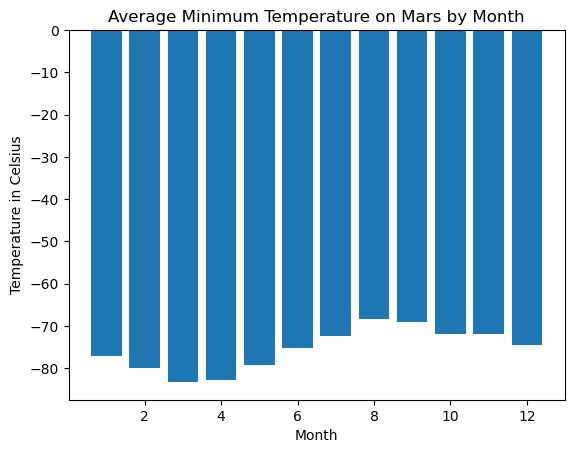

In [104]:
# Plot the average minimum temperature by month
plt.bar(avg_min_temp_by_month['month'], avg_min_temp_by_month['avg_min_temp'])
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature on Mars by Month')
plt.show()


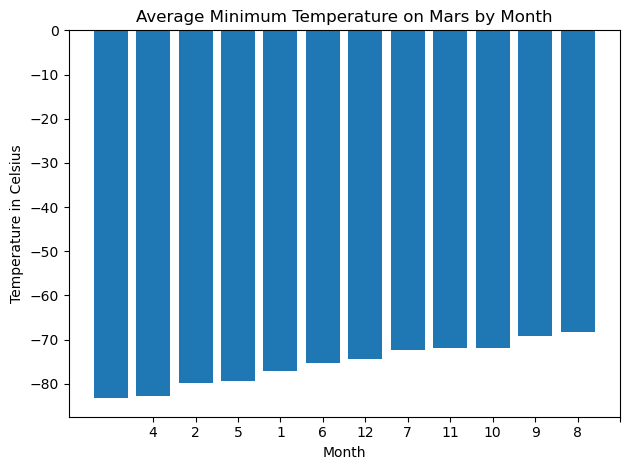

In [105]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp = avg_min_temp_by_month.sort_values(by='avg_min_temp', ascending=True)

#plot the sorted data
plt.bar(sorted_temp['month'].astype(str), sorted_temp['avg_min_temp'])
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature on Mars by Month')
plt.xticks(sorted_temp['month'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [106]:
# 4. What is the average pressure by month?
avg_pressure = mars_temp_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

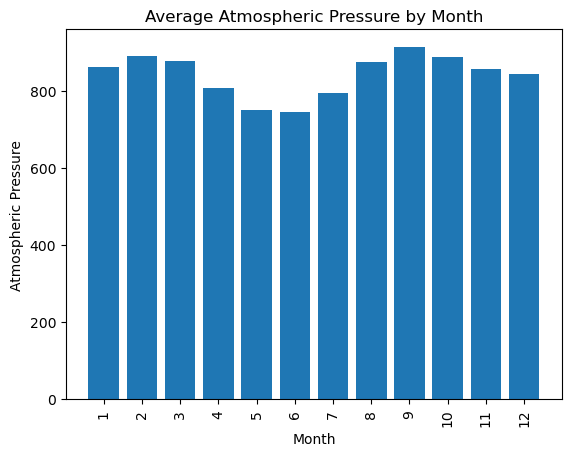

In [107]:
# Plot the average pressure by month
plt.bar(avg_pressure.index, avg_pressure.values)
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')
plt.xticks(avg_pressure.index, rotation=90)
plt.show()

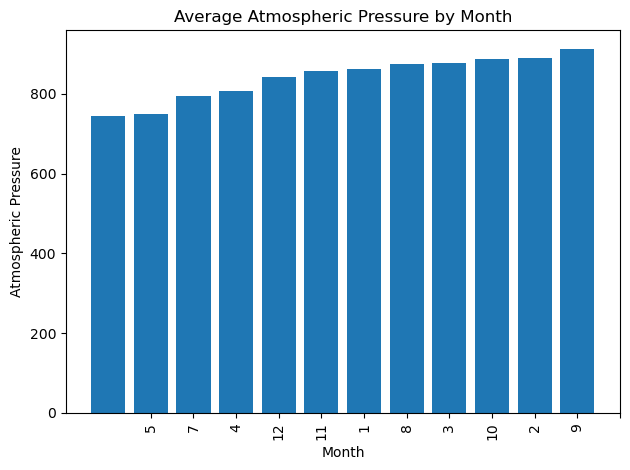

In [108]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = avg_pressure.sort_values(ascending=True)
plt.bar(sorted_pressure.index.astype(str), sorted_pressure.values)
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')
plt.xticks(avg_pressure.index, rotation=90)
plt.tight_layout()
plt.tight_layout()
plt.show()

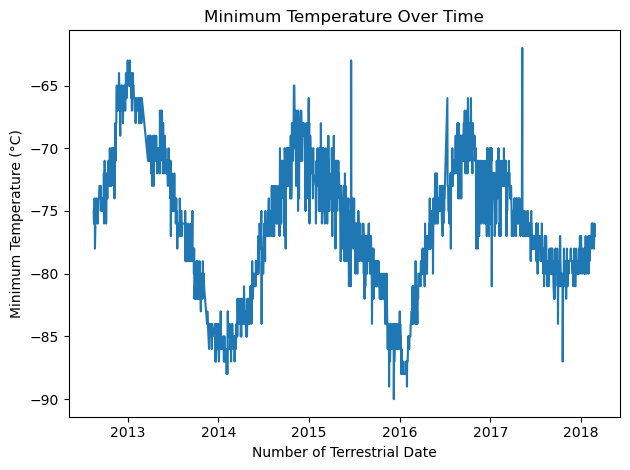

In [109]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Ensure data types are correct
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['min_temp'] = mars_temp_df['min_temp'].astype(float)

# Plot the daily min temperature across Earth days

plt.plot(mars_temp_df['terrestrial_date'], mars_temp_df['min_temp'])
plt.xlabel('Number of Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature Over Time')
plt.tight_layout()
plt.show()


#### Minimum Temperature

By grouping the data by month and calculating the average minimum temperature, we identified the temperature trends throughout the year. The coldest month recorded was Month 3(March), while the warmest was Month 8(August). This indicates significant seasonal variation at Curiosity’s location.

The bar chart displaying average minimum temperature per month—sorted from coldest to warmest—visually confirms this trend and helps in identifying the periods with the most extreme cold and relatively higher temperatures on Mars.

#### Atmospheric Pressure
To understand how atmospheric pressure varies across the year, we grouped the data by month and calculated the average daily atmospheric pressure for each.

The analysis shows that Month 9(September) had the lowest average atmospheric pressure, while Month 6(June) recorded the highest. This variation is likely influenced by seasonal changes in temperature and solar longitude (Ls), which affect the Martian atmosphere's density and circulation.

The bar chart helps visualize these fluctuations, clearly highlighting periods of thin and denser atmosphere at Curiosity’s location.

#### Year Length

The line plot of daily minimum temperature over terrestrial dates reveals a clear cyclical pattern that repeats approximately every 687 Earth days, consistent with the known length of a Martian year.

By observing the temperature peaks and troughs, we can visually estimate that it takes nearly two Earth years for the Martian seasons to complete one full cycle. This repeating trend helps validate that the dataset captures multiple Martian years and supports seasonal climate analysis on Mars.



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [110]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_temp_data.csv', index=False)

In [111]:
browser.quit()